# Load library

In [146]:
# Load library:
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import seaborn as sns
import pandas as pd
import pygeostat as gs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable


Populating the interactive namespace from numpy and matplotlib


In [147]:
griddef = gs.GridDef(griddef="100 0 1 \n100 0 1 \n1 0.5 1")
griddef

Pygeostat GridDef:
100 0.0 1.0 
100 0.0 1.0 
1 0.5 1.0

# Load Models 

## Major direction 

In [153]:
# load and evaluate a saved model
from numpy import loadtxt
from tensorflow.keras.models import load_model

# load model
CNN_Major = load_model('CNN_2_160_Major.h5')
# summarize model.
CNN_Major.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 8)       80        
_________________________________________________________________
re_lu (ReLU)                 (None, 100, 100, 8)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 16)        1168      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 50, 50, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        4

## Minor direction 

In [154]:
# load and evaluate a saved model
from numpy import loadtxt
from tensorflow.keras.models import load_model

# load model
CNN_Minor = load_model('CNN_2_70_Minor.h5')
# summarize model.
CNN_Minor.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 8)       80        
_________________________________________________________________
re_lu (ReLU)                 (None, 100, 100, 8)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 16)        1168      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 50, 50, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        4

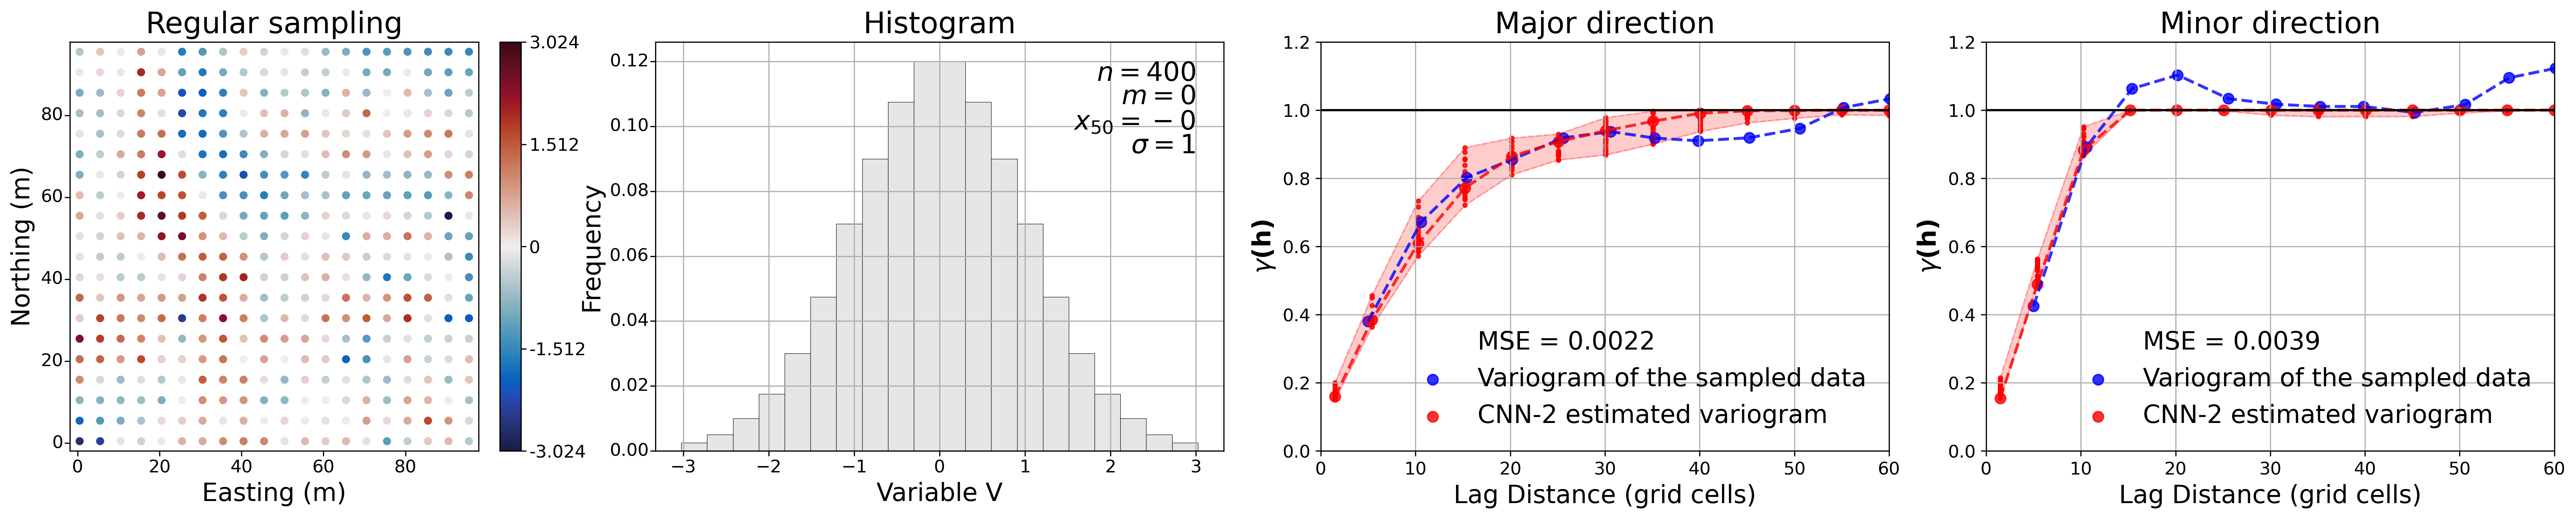

In [219]:
import matplotlib.pyplot as plt
import numpy as np

# Set parameters for all plots
params = {'legend.fontsize': 'large', 'axes.labelsize': 'large', 'axes.titlesize':'large',
         'xtick.labelsize':'large', 'ytick.labelsize':'large'}
pylab.rcParams.update(params)

# Create figure with 4 columns and 1 row
fig, axes = plt.subplots(1, 4, dpi=300, figsize=(5, 5))

# First row, first figure
gs.location_plot(dhs_V, var='NS_value', orient='xy', title='', sigfigs=4, cmap='cmo.balance', 
                  plot_style=True, ax=axes[0],figsize=(4,4))
axes[0].set_title('Regular sampling', fontsize=20)
axes[0].set_xlabel('Easting (m)',fontsize=17);
axes[0].set_ylabel('Northing (m)',fontsize=17)
# First row, second figure
gs.histogram_plot(dhs_V, var='NS_value', bins=20, stat_blk='minimal', ax=axes[1], stat_fontsize=18,figsize=(1,4))
axes[1].set_title('Histogram', fontsize=20)
axes[1].set_xlabel('Variable V',fontsize=17);
axes[1].set_ylabel('Frequency',fontsize=17)
axes[1].grid(True)
# Second row, first figure
nreal = 20 
for i in range(nreal):
    axes[2].scatter(fi[0]['Lag Distance'], np.array(globals()[f'values_Major_Regular_{i}']).reshape(13), 
                     marker='o', color='red', s=7, alpha=0.8)
    
label = f'MSE = {0.0022}'
axes[2].scatter(fi[0]['Lag Distance'], fi[0]['Lag Distance'], marker='', color='white', s=0, alpha=0.8, label=label)

axes[2].scatter(Variogram_Major_Regular['Lag Distance'], Variogram_Major_Regular['Variogram Value'], 
                 marker='o', color='blue', s=50, alpha=0.8, label='Variogram of the sampled data')
axes[2].plot(Variogram_Major_Regular['Lag Distance'], Variogram_Major_Regular['Variogram Value'], 
             color='blue', linewidth=2, alpha=0.8, linestyle='--')

axes[2].scatter(fi[0]['Lag Distance'], np.array(globals()[f'values_Major_Regular_{i}']).reshape(13), 
                 marker='o', color='red', s=50, alpha=0.8, label='CNN-2 estimated variogram')
axes[2].plot(fi[0]['Lag Distance'], np.array(globals()[f'values_Major_Regular_{i}']).reshape(13), 
             color='red', linewidth=2, alpha=0.8, linestyle='--')
axes[2].fill_between(fi[1]['Lag Distance'], max_values['max_values_Major_Regular'], 
                      min_values['min_values_Major_Regular'], color='red', alpha=0.2)

axes[2].legend(loc='lower right', fontsize=17, frameon=False)
axes[2].plot(fi[1]['Lag Distance'], max_values['max_values_Major_Regular'], color='red', 
             linewidth=1, alpha=0.2, linestyle='--')
axes[2].plot(fi[1]['Lag Distance'], min_values['min_values_Major_Regular'], color='red', 
             linewidth=1, alpha=0.2, linestyle='--')

axes[2].set_title('Major direction', fontsize=20)
axes[2].set_xlabel('Lag Distance (grid cells)',fontsize=17);
axes[2].set_ylim(0,1.2) 
axes[2].set_ylabel(r'$\gamma \bf(h)$',fontsize=17)

axes[2].plot([0,60],[1.0,1.0],color='black')
axes[2].set_xlim(0,60)
axes[2].grid(True)

axes[2].figure.set_size_inches(25, 5)


# Third row, first figure
nreal = 20 
for i in range(nreal):
    axes[3].scatter(fi[0]['Lag Distance'], np.array(globals()[f'values_Minor_Regular_{i}']).reshape(13), 
                     marker='o', color='red', s=7, alpha=0.8)
    
label = f'MSE = {0.0039}'
axes[3].scatter(fi[0]['Lag Distance'], fi[0]['Lag Distance'], marker='', color='white', s=0, alpha=0.8, label=label)

axes[3].scatter(Variogram_Minor_Regular['Lag Distance'], Variogram_Minor_Regular['Variogram Value'], 
                 marker='o', color='blue', s=50, alpha=0.8, label='Variogram of the sampled data')
axes[3].plot(Variogram_Minor_Regular['Lag Distance'], Variogram_Minor_Regular['Variogram Value'], 
             color='blue', linewidth=2, alpha=0.8, linestyle='--')

axes[3].scatter(fi[0]['Lag Distance'], np.array(globals()[f'values_Minor_Regular_{i}']).reshape(13), 
                 marker='o', color='red', s=50, alpha=0.8, label='CNN-2 estimated variogram')
axes[3].plot(fi[0]['Lag Distance'], np.array(globals()[f'values_Minor_Regular_{i}']).reshape(13), 
             color='red', linewidth=2, alpha=0.8, linestyle='--')
axes[3].fill_between(fi[1]['Lag Distance'], max_values['max_values_Minor_Regular'], 
                      min_values['min_values_Minor_Regular'], color='red', alpha=0.2)

axes[3].legend(loc='lower right', fontsize=17, frameon=False)
axes[3].plot(fi[1]['Lag Distance'], max_values['max_values_Minor_Regular'], color='red', 
             linewidth=1, alpha=0.2, linestyle='--')
axes[3].plot(fi[1]['Lag Distance'], min_values['min_values_Minor_Regular'], color='red', 
             linewidth=1, alpha=0.2, linestyle='--')

axes[3].set_title('Minor direction', fontsize=20)
axes[3].set_xlabel('Lag Distance (grid cells)',fontsize=17);
axes[3].set_ylabel(r'$\gamma \bf(h)$',fontsize=17)
axes[3].set_ylim(0,1.2) 
axes[3].plot([0,60],[1.0,1.0],color='black')
axes[3].set_xlim(0,60)
axes[3].grid(True)


axes[3].figure.set_size_inches(25, 5)

plt.tight_layout()
plt.savefig('Wf_2_Regular.png')
plt.savefig('Wf_2_Regular.pdf')
plt.savefig('Wf_2_Regular.svg')

plt.show()


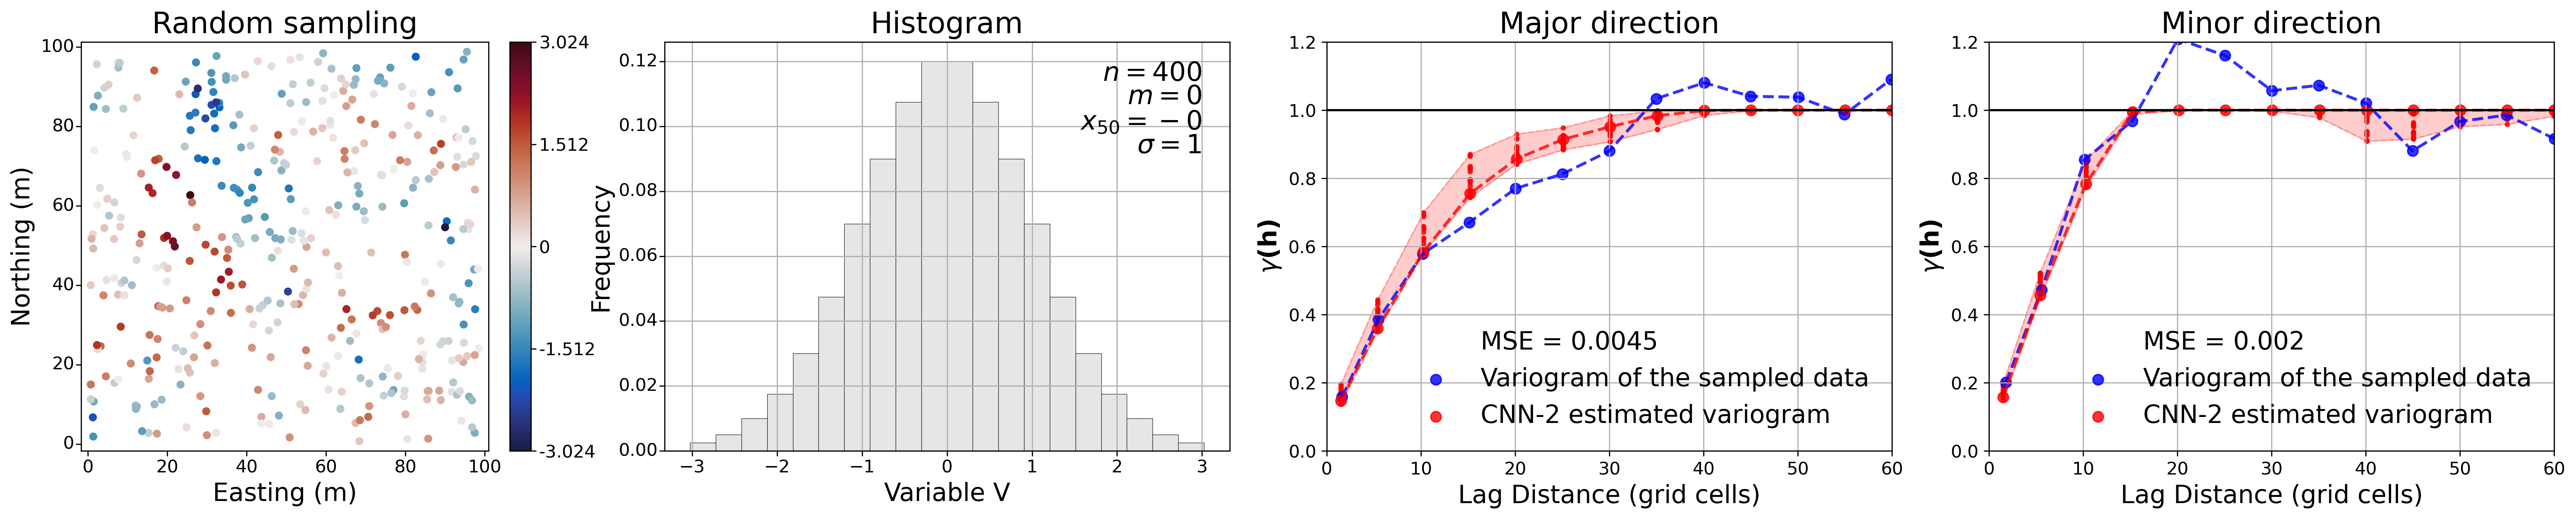

In [220]:
import matplotlib.pyplot as plt
import numpy as np

# Set parameters for all plots
params = {'legend.fontsize': 'large', 'axes.labelsize': 'large', 'axes.titlesize':'large',
         'xtick.labelsize':'large', 'ytick.labelsize':'large'}
pylab.rcParams.update(params)

# Create figure with 4 columns and 1 row
fig, axes = plt.subplots(1, 4, dpi=300, figsize=(5, 5))

# First row, first figure
gs.location_plot(dhs_Rand_V , var='NS_value', orient='xy', title='', sigfigs=4, cmap='cmo.balance', 
                  plot_style=True, ax=axes[0],figsize=(4,4))
axes[0].set_title('Random sampling', fontsize=20)
axes[0].set_xlabel('Easting (m)',fontsize=17);
axes[0].set_ylabel('Northing (m)',fontsize=17)
# First row, second figure
gs.histogram_plot(dhs_Rand_V, var='NS_value', bins=20, stat_blk='minimal', ax=axes[1], stat_fontsize=18,figsize=(1,4))
axes[1].set_title('Histogram', fontsize=20)
axes[1].set_xlabel('Variable V',fontsize=17);
axes[1].set_ylabel('Frequency',fontsize=17)
axes[1].grid(True)
# Second row, first figure
nreal = 20 
for i in range(nreal):
    axes[2].scatter(fi[0]['Lag Distance'], np.array(globals()[f'values_Major_Random_{i}']).reshape(13), 
                     marker='o', color='red', s=7, alpha=0.8)
    
label = f'MSE = {0.0045}'
axes[2].scatter(fi[0]['Lag Distance'], fi[0]['Lag Distance'], marker='', color='white', s=0, alpha=0.8, label=label)

axes[2].scatter(Variogram_Major_Random['Lag Distance'], Variogram_Major_Random['Variogram Value'], 
                 marker='o', color='blue', s=50, alpha=0.8, label='Variogram of the sampled data')
axes[2].plot(Variogram_Major_Random['Lag Distance'], Variogram_Major_Random['Variogram Value'], 
             color='blue', linewidth=2, alpha=0.8, linestyle='--')

axes[2].scatter(fi[0]['Lag Distance'], np.array(globals()[f'values_Major_Random_{i}']).reshape(13), 
                 marker='o', color='red', s=50, alpha=0.8, label='CNN-2 estimated variogram')
axes[2].plot(fi[0]['Lag Distance'], np.array(globals()[f'values_Major_Random_{i}']).reshape(13), 
             color='red', linewidth=2, alpha=0.8, linestyle='--')
axes[2].fill_between(fi[1]['Lag Distance'], max_values['max_values_Major_Random'], 
                      min_values['min_values_Major_Random'], color='red', alpha=0.2)

axes[2].legend(loc='lower right', fontsize=17, frameon=False)
axes[2].plot(fi[1]['Lag Distance'], max_values['max_values_Major_Random'], color='red', 
             linewidth=1, alpha=0.2, linestyle='--')
axes[2].plot(fi[1]['Lag Distance'], min_values['min_values_Major_Random'], color='red', 
             linewidth=1, alpha=0.2, linestyle='--')

axes[2].set_title('Major direction', fontsize=20)
axes[2].set_xlabel('Lag Distance (grid cells)',fontsize=17);
axes[2].set_ylim(0,1.2) 
axes[2].set_ylabel(r'$\gamma \bf(h)$',fontsize=17)

axes[2].plot([0,60],[1.0,1.0],color='black')
axes[2].set_xlim(0,60)
axes[2].grid(True)

axes[2].figure.set_size_inches(25, 5)


# Third row, first figure
nreal = 20 
for i in range(nreal):
    axes[3].scatter(fi[0]['Lag Distance'], np.array(globals()[f'values_Minor_Random_{i}']).reshape(13), 
                     marker='o', color='red', s=7, alpha=0.8)
    
label = f'MSE = {0.0020}'
axes[3].scatter(fi[0]['Lag Distance'], fi[0]['Lag Distance'], marker='', color='white', s=0, alpha=0.8, label=label)

axes[3].scatter(Variogram_Minor_Random['Lag Distance'], Variogram_Minor_Random['Variogram Value'], 
                 marker='o', color='blue', s=50, alpha=0.8, label='Variogram of the sampled data')
axes[3].plot(Variogram_Minor_Random['Lag Distance'], Variogram_Minor_Random['Variogram Value'], 
             color='blue', linewidth=2, alpha=0.8, linestyle='--')

axes[3].scatter(fi[0]['Lag Distance'], np.array(globals()[f'values_Minor_Random_{i}']).reshape(13), 
                 marker='o', color='red', s=50, alpha=0.8, label='CNN-2 estimated variogram')
axes[3].plot(fi[0]['Lag Distance'], np.array(globals()[f'values_Minor_Random_{i}']).reshape(13), 
             color='red', linewidth=2, alpha=0.8, linestyle='--')
axes[3].fill_between(fi[1]['Lag Distance'], max_values['max_values_Minor_Random'], 
                      min_values['min_values_Minor_Random'], color='red', alpha=0.2)

axes[3].legend(loc='lower right', fontsize=17, frameon=False)
axes[3].plot(fi[1]['Lag Distance'], max_values['max_values_Minor_Random'], color='red', 
             linewidth=1, alpha=0.2, linestyle='--')
axes[3].plot(fi[1]['Lag Distance'], min_values['min_values_Minor_Random'], color='red', 
             linewidth=1, alpha=0.2, linestyle='--')

axes[3].set_title('Minor direction', fontsize=20)
axes[3].set_xlabel('Lag Distance (grid cells)',fontsize=17);
axes[3].set_ylabel(r'$\gamma \bf(h)$',fontsize=17)
axes[3].set_ylim(0,1.2) 
axes[3].plot([0,60],[1.0,1.0],color='black')
axes[3].set_xlim(0,60)
axes[3].grid(True)


axes[3].figure.set_size_inches(25, 5)
plt.tight_layout()
plt.savefig('Wf_2_Random.png')
plt.savefig('Wf_2_Random.pdf')
plt.savefig('Wf_2_Random.svg')



plt.show()


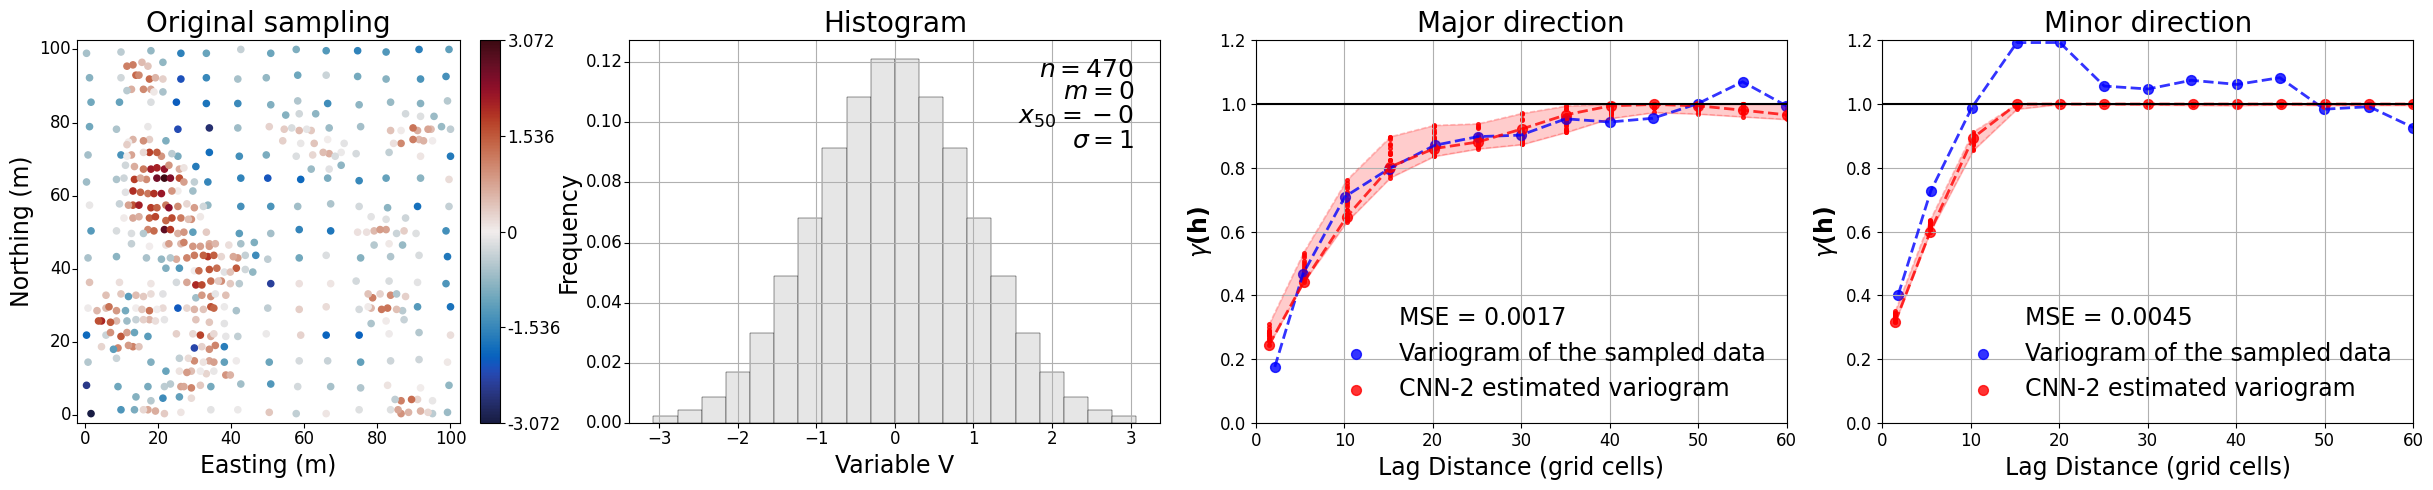

In [221]:
import matplotlib.pyplot as plt
import numpy as np

# Set parameters for all plots
params = {'legend.fontsize': 'large', 'axes.labelsize': 'large', 'axes.titlesize':'large',
         'xtick.labelsize':'large', 'ytick.labelsize':'large'}
pylab.rcParams.update(params)

# Create figure with 4 columns and 1 row
fig, axes = plt.subplots(1, 4, figsize=(10,10))

# First row, first figure
gs.location_plot(Or_100, var='NS_V', orient='xy', title='', sigfigs=4, cmap='cmo.balance', 
                  plot_style=True, ax=axes[0],figsize=(4,4))
axes[0].set_title('Original sampling', fontsize=20)
axes[0].set_xlabel('Easting (m)',fontsize=17);
axes[0].set_ylabel('Northing (m)',fontsize=17)
# First row, second figure
gs.histogram_plot(Or_100, var='NS_V', bins=20, stat_blk='minimal', ax=axes[1], stat_fontsize=18,figsize=(1,4))
axes[1].set_title('Histogram', fontsize=20)
axes[1].set_xlabel('Variable V',fontsize=17);
axes[1].set_ylabel('Frequency',fontsize=17)
axes[1].grid(True)
# Second row, first figure
nreal = 20 
for i in range(nreal):
    axes[2].scatter(fi[0]['Lag Distance'], np.array(globals()[f'values_Major_Original_{i}']).reshape(13), 
                     marker='o', color='red', s=7, alpha=0.8)
    
label = f'MSE = {0.0017}'
axes[2].scatter(fi[0]['Lag Distance'], fi[0]['Lag Distance'], marker='', color='white', s=0, alpha=0.8, label=label)

axes[2].scatter(Variogram_Major_Original['Lag Distance'], Variogram_Major_Original['Variogram Value'], 
                 marker='o', color='blue', s=50, alpha=0.8, label='Variogram of the sampled data')
axes[2].plot(Variogram_Major_Original['Lag Distance'], Variogram_Major_Original['Variogram Value'], 
             color='blue', linewidth=2, alpha=0.8, linestyle='--')

axes[2].scatter(fi[0]['Lag Distance'], np.array(globals()[f'values_Major_Original_{i}']).reshape(13), 
                 marker='o', color='red', s=50, alpha=0.8, label='CNN-2 estimated variogram')
axes[2].plot(fi[0]['Lag Distance'], np.array(globals()[f'values_Major_Original_{i}']).reshape(13), 
             color='red', linewidth=2, alpha=0.8, linestyle='--')
axes[2].fill_between(fi[1]['Lag Distance'], max_values['max_values_Major_Original'], 
                      min_values['min_values_Major_Original'], color='red', alpha=0.2)

axes[2].legend(loc='lower right', fontsize=17, frameon=False)
axes[2].plot(fi[1]['Lag Distance'], max_values['max_values_Major_Original'], color='red', 
             linewidth=1, alpha=0.2, linestyle='--')
axes[2].plot(fi[1]['Lag Distance'], min_values['min_values_Major_Original'], color='red', 
             linewidth=1, alpha=0.2, linestyle='--')

axes[2].set_title('Major direction', fontsize=20)
axes[2].set_xlabel('Lag Distance (grid cells)',fontsize=17);
axes[2].set_ylim(0,1.2) 
axes[2].set_ylabel(r'$\gamma \bf(h)$',fontsize=17)

axes[2].plot([0,60],[1.0,1.0],color='black')
axes[2].set_xlim(0,60)
axes[2].grid(True)

axes[2].figure.set_size_inches(25,5)


# Third row, first figure
nreal = 20 
for i in range(nreal):
    axes[3].scatter(fi[0]['Lag Distance'], np.array(globals()[f'values_Minor_Original_{i}']).reshape(13), 
                     marker='o', color='red', s=7, alpha=0.8)
    
label = f'MSE = {0.0045}'
axes[3].scatter(fi[0]['Lag Distance'], fi[0]['Lag Distance'], marker='', color='white', s=0, alpha=0.8, label=label)

axes[3].scatter(Variogram_Minor_Original['Lag Distance'], Variogram_Minor_Original['Variogram Value'], 
                 marker='o', color='blue', s=50, alpha=0.8, label='Variogram of the sampled data')
axes[3].plot(Variogram_Minor_Original['Lag Distance'], Variogram_Minor_Original['Variogram Value'], 
             color='blue', linewidth=2, alpha=0.8, linestyle='--')

axes[3].scatter(fi[0]['Lag Distance'], np.array(globals()[f'values_Minor_Original_{i}']).reshape(13), 
                 marker='o', color='red', s=50, alpha=0.8, label='CNN-2 estimated variogram')
axes[3].plot(fi[0]['Lag Distance'], np.array(globals()[f'values_Minor_Original_{i}']).reshape(13), 
             color='red', linewidth=2, alpha=0.8, linestyle='--')
axes[3].fill_between(fi[1]['Lag Distance'], max_values['max_values_Minor_Original'], 
                      min_values['min_values_Minor_Original'], color='red', alpha=0.2)

axes[3].legend(loc='lower right', fontsize=17, frameon=False)
axes[3].plot(fi[1]['Lag Distance'], max_values['max_values_Minor_Original'], color='red', 
             linewidth=1, alpha=0.2, linestyle='--')
axes[3].plot(fi[1]['Lag Distance'], min_values['min_values_Minor_Original'], color='red', 
             linewidth=1, alpha=0.2, linestyle='--')

axes[3].set_title('Minor direction', fontsize=20)
axes[3].set_xlabel('Lag Distance (grid cells)',fontsize=17);
axes[3].set_ylabel(r'$\gamma \bf(h)$',fontsize=17)
axes[3].set_ylim(0,1.2) 
axes[3].plot([0,60],[1.0,1.0],color='black')
axes[3].set_xlim(0,60)
axes[3].grid(True)


axes[3].figure.set_size_inches(25,5)
plt.tight_layout()
plt.savefig('Wf_2_Original.png')
plt.savefig('Wf_2_Original.pdf')
plt.savefig('Wf_2_Original.svg')




plt.show()
